In [33]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
train_dir = r'C:\Users\harekrushna\Documents\internship\MIDAS TASKS\MIDAS TASK 2\Part 1\trainPart1'

In [36]:
# Data Preprocessing

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (28, 28),
        batch_size = 20,
        class_mode = 'sparse')

Found 2480 images belonging to 62 classes.


In [39]:
# structure of CNN model

In [40]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [52]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation = 'relu'))

model.add(layers.Dense(10, activation = 'softmax'))

# Here, we are reshaping the image to (28, 28)
# But after MaxPooling with (2, 2) window, they will be reduced to (14, 14).
# With the next MaxPooling layer, the images will be reduced to
# (7, 7) by using (2, 2) window and so on..

# This is a standard practice, the image size should decrease with each Conv
# layer and the feature map height should increase as we go along the network.

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

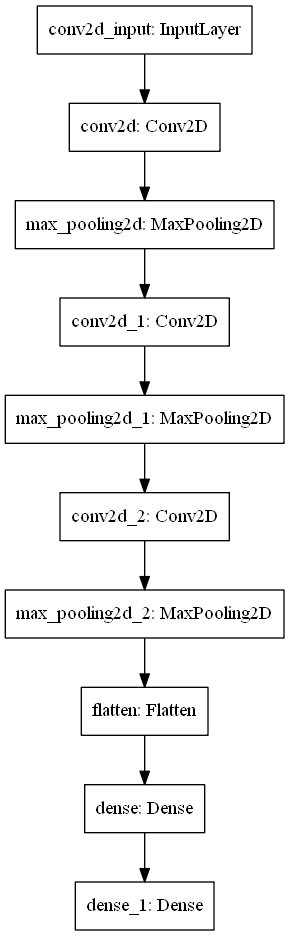

In [54]:
import pydot
keras.utils.plot_model(model)

Documentation : https://keras.io/api/models/sequential/

In [55]:
# Next step is to compile the model

In [56]:
from tensorflow.keras import optimizers

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

In [57]:
model.save("part1.h5")

In [58]:
from tensorflow.keras import backend as k
k.clear_session()
del model